In [1]:
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
dataset = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
print(dataset.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [8]:
dataset

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Splitting the data read into the images & their corresponding labels. 
#The ‘0’ contains the labels, & so we drop the ‘0’ column from the data dataframe read & use it in the y to form the labels.

X = dataset.drop('0', axis=1)

In [10]:
X.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
Y = dataset['0'] # y is target label dataset 

In [12]:
Y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
len(dataset) #here it means the dataset is not divided into train & test data 

372450

In [15]:
# so we have to divide our dataset for training & testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
len(X_train)

297960

In [17]:
len(Y_train)

297960

In [18]:
len(X_test)

74490

In [19]:
# reshaping the data in the csv file, so that it can be displayed as an image 
X_train = np.reshape(X_train.values, (X_train.shape[0], 28, 28))

In [20]:
X_train[0].shape

(28, 28)

In [21]:
X_test.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
X_test = np.reshape(X_test.values,(X_test.shape[0], 28, 28))

In [23]:
X_test[0].shape

(28, 28)

In [24]:
# shape of train & test data after reshaping
print(X_train.shape)
print(X_test.shape)


(297960, 28, 28)
(74490, 28, 28)


In [25]:
type(Y_train)

pandas.core.series.Series

In [26]:
Y_train

295811    19.0
188162    14.0
271384    18.0
350238    23.0
144243    14.0
          ... 
286377    19.0
226333    17.0
103960    11.0
2995       0.0
282833    19.0
Name: 0, Length: 297960, dtype: float32

In [27]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R'
            ,18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
# in dictionary word_dict we are labelling or mapping the integer value with character 

In [28]:
type(word_dict)

dict

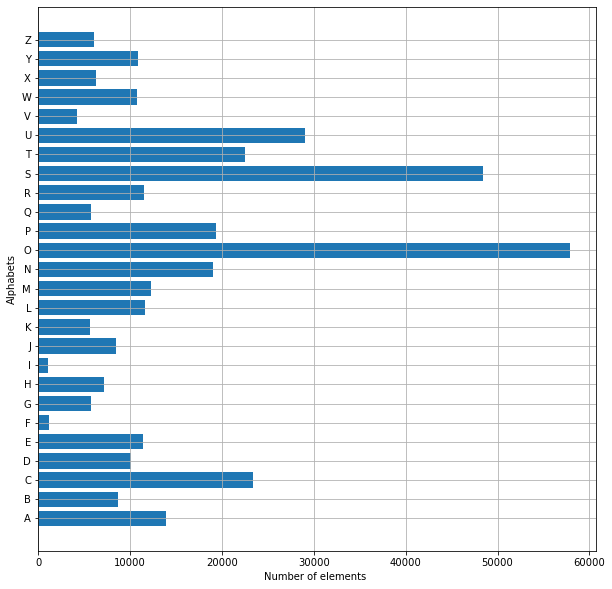

In [29]:
Y_int = np.int0(Y) # number of images of each character 
count = np.zeros(26, dtype='int') # creating an array of size 26 with 0 values
for i in Y_int:
    count[i] +=1  # count will have number of images of each character 
alphabets = []
for i in word_dict.values():
    alphabets.append(i) #it will append labelled characters from 0-25 
fig, ax = plt.subplots(1,1, figsize=(10,10)) # creating a figure of (10,10) size wit starting from 1 in both axis
ax.barh(alphabets, count) # plotting alphabets & count(no.of images of each character type)
plt.xlabel("Number of elements ") 
plt.ylabel("Alphabets")
plt.grid()
plt.show()

In [30]:
Y_int

array([ 0,  0,  0, ..., 25, 25, 25], dtype=int64)

In [31]:
count

array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
        8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
       48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [32]:
from sklearn.utils import shuffle
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

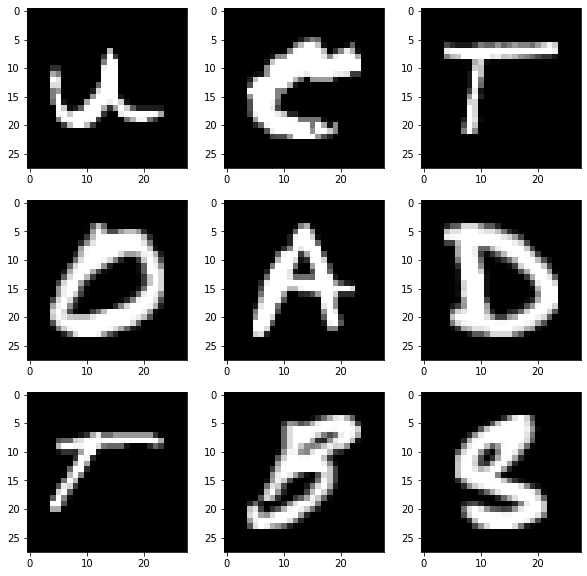

In [33]:
# shuffling images 
shuff = shuffle(X_train[:100])

fig, ax = plt.subplots(3,3, figsize= (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap = 'gray')
    
plt.show()

In [34]:
X_train.shape[0]

297960

In [35]:
X_train.shape[1]

28

In [36]:
X_train.shape[2]

28

In [37]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
# reshaping the train & test data so that it can be put into model 

In [38]:
print(X_test.shape)
print(X_train.shape)

(74490, 28, 28, 1)
(297960, 28, 28, 1)


In [39]:
from tensorflow.keras.utils import to_categorical

In [40]:
Y_train_cat = to_categorical(Y_train, num_classes= 26, dtype ='int') # creating dummy variables for train data

In [41]:
Y_test_cat = to_categorical(Y_test, num_classes= 26, dtype='int') # creating dummy variables for test data

In [42]:
Y_train_cat.shape

(297960, 26)

In [43]:
Y_test_cat.shape

(74490, 26)

In [44]:
from keras.models import Sequential

In [45]:
model = Sequential()

In [46]:
from keras.layers import Convolution2D

In [47]:
model.add(Convolution2D(filters= 32, kernel_size= (3,3), activation='relu', input_shape = (28,28,1)))

In [48]:
from keras.layers import MaxPooling2D

In [49]:
model.add(MaxPooling2D(pool_size =(2,2), strides = 2))

In [50]:
model.add(Convolution2D(filters= 64, kernel_size= (3,3), activation='relu', padding = 'same'))


In [51]:
model.add(MaxPooling2D(pool_size =(2,2), strides = 2))

In [52]:
model.add(Convolution2D(filters= 128, kernel_size= (3,3), activation='relu', padding = 'valid'))

In [53]:
model.add(MaxPooling2D(pool_size =(2,2), strides = 2))

In [54]:
from keras.layers import Flatten

In [55]:
model.add(Flatten())

In [56]:
from keras.layers import Dense

In [57]:
model.add(Dense(128, activation = 'relu'))

In [58]:
model.add(Dense(64, activation = 'relu'))

In [59]:
model.add(Dense(26, activation = 'softmax'))

In [60]:
model.compile(optimizer = "adam",
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [61]:
model.fit(X_train, Y_train_cat, epochs =1, validation_data=(X_test, Y_test_cat))

9312/9312 [==============================] - 383s 41ms/step - loss: 0.1512 - accuracy: 0.9591 - val_loss: 0.1144 - val_accuracy: 0.9671


In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [100]:
img2 = np.reshape(X_test[300], (1,28,28,1))

O


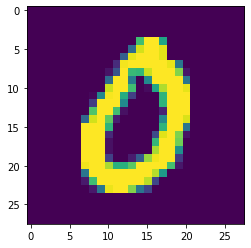

In [103]:
img = word_dict[np.argmax(model.predict(img2))]
print(img)
plt.imshow(X_test[300])
                          

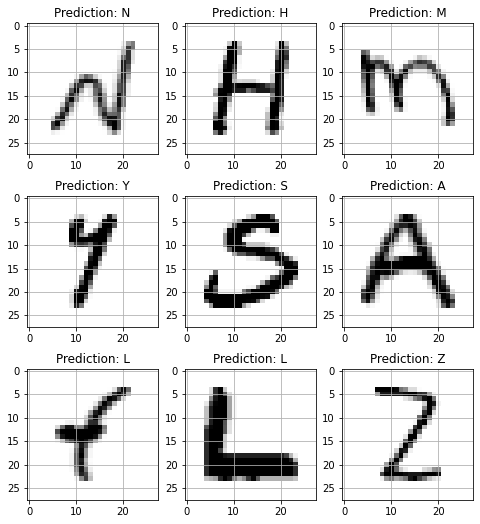

In [104]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(Y_test_cat[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [120]:
# doing prediction on external image
img1 = cv2.imread("image3.png")
img1_copy = img1.copy()

img1_copy = cv2.cvtColor(img1_copy, cv2.COLOR_BGR2RGB)
img1_copy = cv2.resize(img1_copy, (400,440))


In [121]:
img1_copy = cv2.GaussianBlur(img1_copy, (7,7), 0)
img1_gray = cv2.cvtColor(img1_copy, cv2.COLOR_BGR2GRAY)
_, img1_thresh = cv2.threshold(img1_gray, 100, 255, cv2.THRESH_BINARY_INV)

img1_final = cv2.resize(img1_thresh,(28,28))
img1_final = np.reshape(img1_final, (1,28,28,1))

In [123]:

img1_pred = word_dict[np.argmax(model.predict(img1_final))]

cv2.putText(img1_copy, "Prediction: " + img1_pred, (20,350), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,0,255))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img1_copy)
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()